# Reddit CryptoCurrency Initial Analysis

Azim Hirjani and Joseph Augustine

In [1]:
import pandas as pd

from bs4 import BeautifulSoup

import numpy as np

import tqdm

import itertools

import plotly.express as px

import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Read Data

In [2]:
submission_data = pd.read_csv("text_submissions.csv.gz", compression="gzip")

c:\users\azimh\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (2,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


There are 3,496,180 rows in the submission data

In [3]:
submission_data.shape

(3496180, 9)

In [4]:
submission_data.head()

,id,author,created_utc,domain,is_self,score,selftext,title,subreddit
0,t3_npxigk,All_Consuming_Void,1622563615,self.BeautyGuruChatter,True,0.0,[removed],Hyram launches his own brand,BeautyGuruChatter
1,t3_nqj6bf,AutoModerator,1622631621,self.BeautyGuruChatter,True,38.0,What are the influencers trying to influence y...,What I'm not gonna buy Wednesday - Anti-haul,BeautyGuruChatter
2,t3_nk0btr,barrahhhh,1621869439,reddit.com,False,144.0,NaN,Plouise goes off in facebook group for 'bullying',BeautyGuruChatter
3,t3_nrbybs,[deleted],1622722260,self.BeautyGuruChatter,True,2.0,[deleted],Is youtube algorithm against Susan Yara? She g...,BeautyGuruChatter
4,t3_nl0ebd,carlosShook,1621977767,vm.tiktok.com,False,0.0,NaN,Sephora steals concept from Huntr Faulknr afte...,BeautyGuruChatter


In [5]:
comment_data = pd.read_csv("text_comments.csv.gz", compression="gzip")

c:\users\azimh\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


There are 46,413,725 rows in the comment data

In [6]:
comment_data.shape

(46413725, 7)

In [7]:
comment_data.head()

,id,score,link_id,author,subreddit,body,created_utc
0,t1_ftjl56l,4.0,t3_gzv6so,mega_trex,BeautyGuruChatter,Does anyone have a good cruelty free one? The ...,1.591756e+09
1,t1_ftjpxmc,6.0,t3_gzv6so,[deleted],BeautyGuruChatter,(stares at my soft glam i've had for like 3 ye...,1.591758e+09
2,t1_gzzxfyt,22.0,t3_nodb9e,divadream,BeautyGuruChatter,When Jen’s initial reactions came out to the s...,1.622398e+09
3,t1_gzzy7nc,92.0,t3_no6qaj,Ziegenkoennenfliegen,BeautyGuruChatter,I think you mean a \n>Highschool *fucking* bully,1.622399e+09
4,t1_h00tpbp,82.0,t3_nolx7p,meowrottenralph,BeautyGuruChatter,Ugh. I was honestly hoping that this brand wou...,1.622415e+09


## Missing Values

Find rows with NaN values

In [8]:
submission_data.isna().sum()

id                   0
author               0
created_utc          0
domain             601
is_self              1
score                1
selftext       1609826
title                7
subreddit            2
dtype: int64

In [9]:
comment_data.isna().sum()

id               65539
score          4385365
link_id        4385426
author         4385427
subreddit      4385426
body           4385728
created_utc    5692236
dtype: int64

Drop rows that have NaN for the columns we are focusing on

In [10]:
submission_data.dropna(subset=["score", "title", "subreddit", "created_utc"], inplace=True)

comment_data.dropna(subset=["score", "body", "subreddit", "created_utc"], inplace=True)

In [11]:
submission_data.isna().sum()

id                   0
author               0
created_utc          0
domain             600
is_self              0
score                0
selftext       1609823
title                0
subreddit            0
dtype: int64

In [12]:
comment_data.isna().sum()

id             0
score          0
link_id        0
author         1
subreddit      0
body           0
created_utc    0
dtype: int64

We have removed 7 rows

In [13]:
submission_data.shape

(3496173, 9)

We have removed 5,692,531 rows

In [14]:
comment_data.shape

(40721194, 7)

### Date

Drop dates that are not numbers because they mess with the parser

In [15]:
submission_data = submission_data[submission_data["created_utc"].apply(lambda x: str(x).isdigit())]

Need to parse the date

In [16]:
submission_data["created_utc"] = pd.to_datetime(submission_data["created_utc"], unit="s")

In [17]:
comment_data["created_utc"] = pd.to_datetime(comment_data["created_utc"], unit="s")

In [18]:
submission_data.head()

,id,author,created_utc,domain,is_self,score,selftext,title,subreddit
0,t3_npxigk,All_Consuming_Void,2021-06-01 16:06:55,self.BeautyGuruChatter,True,0.0,[removed],Hyram launches his own brand,BeautyGuruChatter
1,t3_nqj6bf,AutoModerator,2021-06-02 11:00:21,self.BeautyGuruChatter,True,38.0,What are the influencers trying to influence y...,What I'm not gonna buy Wednesday - Anti-haul,BeautyGuruChatter
2,t3_nk0btr,barrahhhh,2021-05-24 15:17:19,reddit.com,False,144.0,NaN,Plouise goes off in facebook group for 'bullying',BeautyGuruChatter
3,t3_nrbybs,[deleted],2021-06-03 12:11:00,self.BeautyGuruChatter,True,2.0,[deleted],Is youtube algorithm against Susan Yara? She g...,BeautyGuruChatter
4,t3_nl0ebd,carlosShook,2021-05-25 21:22:47,vm.tiktok.com,False,0.0,NaN,Sephora steals concept from Huntr Faulknr afte...,BeautyGuruChatter


In [19]:
comment_data.head()

,id,score,link_id,author,subreddit,body,created_utc
0,t1_ftjl56l,4.0,t3_gzv6so,mega_trex,BeautyGuruChatter,Does anyone have a good cruelty free one? The ...,2020-06-10 02:19:18
1,t1_ftjpxmc,6.0,t3_gzv6so,[deleted],BeautyGuruChatter,(stares at my soft glam i've had for like 3 ye...,2020-06-10 03:06:22
2,t1_gzzxfyt,22.0,t3_nodb9e,divadream,BeautyGuruChatter,When Jen’s initial reactions came out to the s...,2021-05-30 18:12:37
3,t1_gzzy7nc,92.0,t3_no6qaj,Ziegenkoennenfliegen,BeautyGuruChatter,I think you mean a \n>Highschool *fucking* bully,2021-05-30 18:19:03
4,t1_h00tpbp,82.0,t3_nolx7p,meowrottenralph,BeautyGuruChatter,Ugh. I was honestly hoping that this brand wou...,2021-05-30 22:47:14


## Data Selection

We want to select submissions from suberddits that are related to crypto in general but are not biased to a specific one. Here we can select names of subreddits that have the word "Crypto" in it.

In [20]:
crypto_subreddits = submission_data[submission_data["subreddit"].str.contains("Crypto", na=False)]["subreddit"].append(comment_data[comment_data["subreddit"].str.contains("Crypto", na=False)]["subreddit"]).unique()

crypto_subreddits = np.append(crypto_subreddits, ["btc", "BitcoinBeginners", "BitcoinMarkets", "BitcoinBeginners", "Bitcoin", "ethereum", "Vechain", "Ripple", "LitecoinMarkets", "dogecoin", "Monero", "Stellar"])

crypto_subreddits

array(['Crypto_com', 'CryptoCurrency', 'CryptoMarkets', 'CryptoMoonShots',
       'btc', 'BitcoinBeginners', 'BitcoinMarkets', 'BitcoinBeginners',
       'Bitcoin', 'ethereum', 'Vechain', 'Ripple', 'LitecoinMarkets',
       'dogecoin', 'Monero', 'Stellar'], dtype=object)

In [21]:
crypto_submission_data = submission_data[submission_data["subreddit"].isin(crypto_subreddits)]

crypto_submission_data.head()

,id,author,created_utc,domain,is_self,score,selftext,title,subreddit
22207,t3_ia2kez,miningmad,2020-08-15 06:26:45,self.Crypto_com,True,3.0,If CRO staking term is completed on the exchan...,Partially unstake CRO from Exchange?,Crypto_com
22208,t3_iak8pu,sustainable_me,2020-08-16 02:04:33,self.Crypto_com,True,2.0,""" Unfortunately we cannot offer Exchange servi...",Can anyone explain this error when trying to a...,Crypto_com
22209,t3_ibnnbe,Wololo242,2020-08-17 21:43:16,self.Crypto_com,True,0.0,[removed],Question about potential bitcoin 51% attack,Crypto_com
22210,t3_ibzh30,[deleted],2020-08-18 11:46:40,self.Crypto_com,True,1.0,[deleted],Not accepting my 2FA code,Crypto_com
22211,t3_ic8d4w,schwiz,2020-08-18 19:54:36,self.Crypto_com,True,0.0,[removed],$5 to withdraw LINK right now?,Crypto_com


In [22]:
crypto_comment_data = comment_data[comment_data["subreddit"].isin(crypto_subreddits)]

crypto_comment_data.head()

,id,score,link_id,author,subreddit,body,created_utc
295855,t1_g7gki99,2.0,t3_j378ct,jaicue24,Crypto_com,In US and ordered Royal Indigo on 9/4. Receive...,2020-10-02 23:02:51
295856,t1_h1knofh,2.0,t3_ny6t7y,Epyimpervious,Crypto_com,Okay that's great then. I hope you get it by t...,2021-06-13 01:00:43
295857,t1_g7i03m4,3.0,t3_j41mvv,ativerso1,Crypto_com,"excellent, congrats Paul..waiting for more of ...",2020-10-03 09:24:31
295858,t1_g7j27dr,8.0,t3_j4c03c,[deleted],Crypto_com,[deleted],2020-10-03 17:03:50
295859,t1_h1m7d1y,6.0,t3_nytvmr,snufflefrump,Crypto_com,Well I still want alerts for the coins I'm fol...,2021-06-13 12:37:41


## CryptoCurrency Data

We need a dataset of known cryptocurrencies to find in the title of the submissions so we will create one because there is no dataset of cryptocurrencies including both popular and unpopular ones. We have saved an html file from an online list and will scrape the data from it using BeautifulSoup.

In [23]:
f = open('coins.txt', 'r', encoding="utf8")

contents = f.read()

f.close()

soup = BeautifulSoup(contents, 'html.parser')

In [24]:
crypto_names = list(map(lambda x: str(x.text).upper(), list(soup.find_all("span", class_="tw-hidden d-lg-block font-bold"))))
crypto_symbols = list(map(lambda x: str(x.text).upper(), list(soup.find_all("span", class_="d-lg-none font-bold"))))

Now we create the index for our dataframes to which will be the crypto name/symbol then the date

In [25]:
crypto_submission_data["created_utc"].max()

Timestamp('2021-06-30 23:08:42')

In [26]:
crypto_submission_data["created_utc"].min()

Timestamp('2019-01-01 00:10:23')

In [27]:
crypto_comment_data["created_utc"].max()

Timestamp('2021-06-30 23:56:41')

In [28]:
crypto_comment_data["created_utc"].min()

Timestamp('2019-01-01 00:23:58')

In [29]:
datelist = pd.date_range(start="2019-01-01",end="2021-06-30").map(lambda x: str(x.date()))

In [30]:
name_pairs = []

for element in itertools.product(crypto_names, datelist):
    name_pairs.append(element)
    
name_index = pd.MultiIndex.from_tuples(name_pairs, names=["Name", "Date"])

In [31]:
symbol_pairs = []

for element in itertools.product(crypto_symbols, datelist):
    symbol_pairs.append(element)
    
symbol_index = pd.MultiIndex.from_tuples(symbol_pairs, names=["Name", "Date"])

Because people use both the cryptocurrency name and symbol we will need to keep track of both

In [32]:
df_name = pd.DataFrame(index=name_index, data={"Score":0})

df_symbol = pd.DataFrame(index=symbol_index, data={"Score":0})

After scraping we generate a DataFrame of names and symbols for each date to keep track of mentions, there are 10,786 coins we are keeping track of

In [33]:
df_name.head()

Score
Name    Date             
BITCOIN 2019-01-01      0
        2019-01-02      0
        2019-01-03      0
        2019-01-04      0
        2019-01-05      0

In [34]:
df_symbol.head()

Score
Name Date             
BTC  2019-01-01      0
     2019-01-02      0
     2019-01-03      0
     2019-01-04      0
     2019-01-05      0

## Search

Now we will loop through the crypto related submissions and look for mentions of crypto names and symbols

In [35]:
names = dict(zip(df_name.index, range(0, 9836831)))

for row in tqdm.tqdm(crypto_submission_data.values, total=len(crypto_submission_data.values)):
    title = str(row[6])
    score = int(row[5])
    date = str(row[2].date())
    for word in title.split(" "):
        word = word.upper()
        if ((word,date) in names):
            df_name.iloc[names[(word, date)],0] += score

100%|█████████████████████████████████████████████████████████████████████████| 23740/23740 [00:01<00:00, 18013.67it/s]


In [36]:
symbols = dict(zip(df_symbol.index, range(0, 9836831)))

for row in tqdm.tqdm(crypto_submission_data.values, total=len(crypto_submission_data.values)):
    title = str(row[6])
    score = int(row[5])
    date = str(row[2].date())
    for word in title.split(" "):
        if ((word,date) in symbols):
            df_symbol.iloc[symbols[(word, date)],0] += score

100%|█████████████████████████████████████████████████████████████████████████| 23740/23740 [00:00<00:00, 44013.37it/s]


In [37]:
df_name.head()

Score
Name    Date             
BITCOIN 2019-01-01     78
        2019-01-02      0
        2019-01-03      6
        2019-01-04      5
        2019-01-05     20

In [38]:
df_symbol.head()

Score
Name Date             
BTC  2019-01-01      0
     2019-01-02      0
     2019-01-03      0
     2019-01-04      0
     2019-01-05     10

Now we will loop through the crypto related comments and look for mentions of crypto names and symbols

In [39]:
for row in tqdm.tqdm(crypto_comment_data.values, total=len(crypto_comment_data.values)):
    body = str(row[5])
    score = int(row[1])
    date = str(row[6].date())
    for word in body.split(" "):
        word = word.upper()
        if ((word,date) in names):
            df_name.iloc[names[(word, date)],0] += score

100%|███████████████████████████████████████████████████████████████████████| 243397/243397 [00:16<00:00, 14620.68it/s]


In [40]:
for row in tqdm.tqdm(crypto_comment_data.values, total=len(crypto_comment_data.values)):
    body = str(row[5])
    score = int(row[1])
    date = str(row[6].date())
    for word in body.split(" "):
        word = word.upper()
        if ((word,date) in symbols):
            df_symbol.iloc[symbols[(word, date)],0] += score

100%|████████████████████████████████████████████████████████████████████████| 243397/243397 [02:03<00:00, 1978.28it/s]


Resulting in the following dataframes

In [41]:
df_name.head()

Score
Name    Date             
BITCOIN 2019-01-01    105
        2019-01-02     -3
        2019-01-03    115
        2019-01-04     57
        2019-01-05     35

In [42]:
df_symbol.head()

Score
Name Date             
BTC  2019-01-01      0
     2019-01-02    -34
     2019-01-03     15
     2019-01-04      2
     2019-01-05     40

Now we combine the results into a single dataframe

In [43]:
name_symbol = []

for element in zip(crypto_names,crypto_symbols):
    name_symbol.append(element)

pairs = []

for element in itertools.product(name_symbol, datelist):
    pairs.append((element[0][0], element[0][1], element[1]))
    
index = pd.MultiIndex.from_tuples(pairs, names=["Name","Symbol", "Date"])

In [44]:
df_crypto = pd.DataFrame(index=index, data={"Name Score": df_name["Score"].values, "Symbol Score": df_symbol["Score"].values ,"Total Score":df_name["Score"].values + df_symbol["Score"].values})

In [45]:
df_crypto.head()

Name Score  Symbol Score  Total Score
Name    Symbol Date                                             
BITCOIN BTC    2019-01-01         105             0          105
               2019-01-02          -3           -34          -37
               2019-01-03         115            15          130
               2019-01-04          57             2           59
               2019-01-05          35            40           75

## Most and Least Popular Crypto

In [68]:
df_crypto.reset_index().groupby(by=["Name", "Symbol"]).sum().sort_values(by="Total Score", ascending=False).head(20)

,,Name Score,Symbol Score,Total Score
Name,Symbol,,,
THENODE,THE,0,722096,722096
ALPHA TOKEN,A,0,474196,474196
YOUVES YOU GOVERNANCE,YOU,0,244401,244401
INVICTUS,IN,0,240783,240783
INFINITY TOKEN,IT,0,228937,228937
FORTUNA SITTARD FAN TOKEN,FOR,0,196955,196955
JUST,JST,186856,5,186861
BITCOIN,BTC,84478,52289,136767
COIN,COIN,115148,0,115148


In [47]:
df_crypto.reset_index().groupby(by=["Name", "Symbol"]).sum().sort_values(by="Total Score", ascending=True).head(20)

,,Name Score,Symbol Score,Total Score
Name,Symbol,,,
H3X,H3X,-27,-27,-54
DRAGONCHAIN,DRGN,4,-56,-52
COINMETRO,XCM,-34,2,-32
TOKOIN,TOKO,-22,0,-22
NERVA,XNV,-22,0,-22
BLOWUP,$BLOW,-21,0,-21
TEMTUM,TEM,-19,-1,-20
GRAPE PROTOCOL,GRAPE,0,-15,-15
BUNNYPARK,BP,0,-12,-12


## Most and Least Popular Crypto After Cleaning

Generating list of common english words

In [158]:
from sklearn.feature_extraction import text

additional_stop_words = ["JST", "COIN", "JUST", "LIKE", "TEAM", "BUY", "MONEY", "CAP", "TIME", "GOOD", "MEME", "LOL", "FTR", "USE", "XWP", "PAPER", "NEW", "SEEN", "GTC", "GAINS", "LONG", "REWARDS", "BIG", "GOT", "NEAR", "CCY", "HODL", "NADA", "LOT", "STRONG", "THT", "NICE", "PAGE", "YLD", "DTA", "MISS", "FIAT", "DID", "MM", "NFT", "SURE", "DAY", "GAS", "YES", "BETTER", "CHN", "POST", "MKS", "RISE", "VALUE", "SHIT", "CHANGE", "TOOLS", "BEST", "HELP", "PAY", "MOON", "SAFE", "WORK", "CASH", "RUG", "TRY", "DEX", "START", "SIMPLE", "RED", "DOX", "DIP", "LOVE", "LET", "REL", "HIGH", "AUTO", "SOLD", "LIFE", "LINA", "USD", "LUCKY"]

stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)

upper_stop = []

for word in stop_words:
    upper_stop.append(word.upper())

In [159]:
df_clean = df_crypto.copy()

Dropping rows that have the common english words as symbol

In [160]:
list_symbols = df_crypto.index.map(lambda x: x[1]).unique()

for stop in tqdm.tqdm(upper_stop,total=len(upper_stop)):
    if stop in list_symbols:
        df_clean.drop(axis=0 ,labels=[stop], level=1, inplace=True)

100%|████████████████████████████████████████████████████████████████████████████████| 396/396 [29:58<00:00,  4.54s/it]


In [162]:
df_clean.reset_index().groupby(by=["Name", "Symbol"]).sum().sort_values(by="Total Score", ascending=False).head(10)

,,Name Score,Symbol Score,Total Score
Name,Symbol,,,
BITCOIN,BTC,84478,52289,136767
ETHEREUM,ETH,13396,25184,38580
VECHAIN,VET,25062,9821,34883
BINANCE-PEG DOGECOIN,DOGE,0,34359,34359
PANCAKESWAP,CAKE,22385,671,23056
REWARDS,RWD,19624,0,19624
DOGECOIN,DOGE,17867,0,17867
OEC BINANCE COIN,BNB,0,17076,17076
BSC FARM,BSC,0,16387,16387


## Price





## Bitcoin

In [199]:
btc = pd.read_csv("BTC-USD.csv")

C:\Users\azimh\AppData\Local\Temp/ipykernel_1524/10476558.py:18: PerformanceWarning:

indexing past lexsort depth may impact performance.



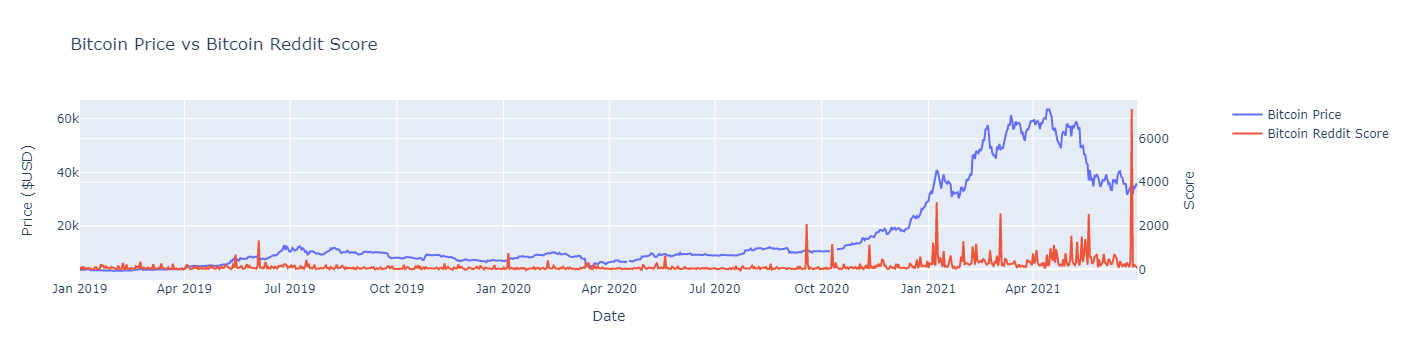

In [200]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=btc.Date, y=btc.Close, name="Bitcoin Price"),
    secondary_y=False,
)

fig.update_layout(
    title_text="Bitcoin Price vs Bitcoin Reddit Score"
)

fig.add_trace(
    go.Scatter(x=df_crypto.loc[("BITCOIN", "BTC")].index, y=df_crypto.loc["BITCOIN"]["Total Score"], name="Bitcoin Reddit Score"),
    secondary_y=True,
)

fig.update_xaxes(title_text="Date")

fig.update_yaxes(title_text="Price ($USD)", secondary_y=False)
fig.update_yaxes(title_text="Score", secondary_y=True)

fig.show()

In [201]:
fig.write_html("bitcoin.html")

## H3X

In [202]:
hx = pd.read_csv("h3x.csv")

In [203]:
hx["snapped_at"] = pd.to_datetime(hx["snapped_at"]).dt.date

In [204]:
hx.sort_values(by="snapped_at", ascending=True, inplace=True)

C:\Users\azimh\AppData\Local\Temp/ipykernel_1524/2522852420.py:18: PerformanceWarning:

indexing past lexsort depth may impact performance.



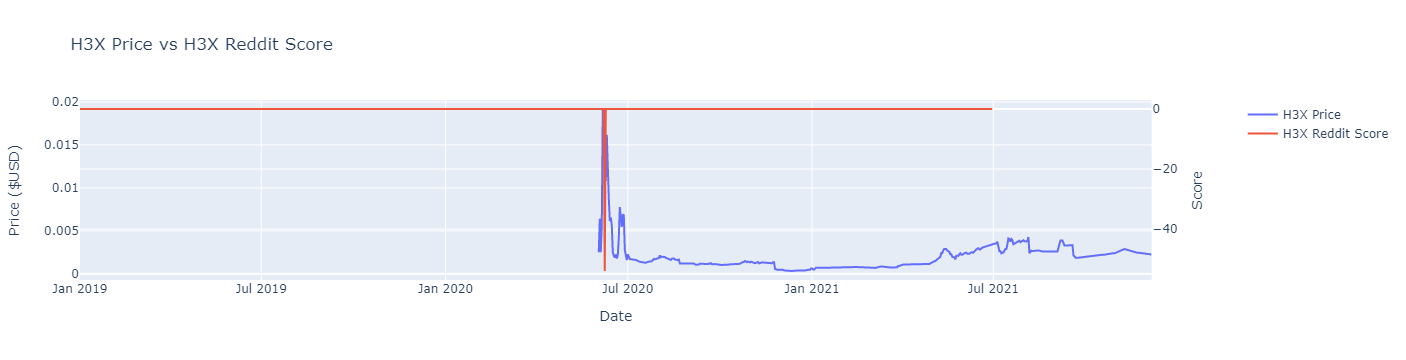

In [205]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=hx.snapped_at, y=hx.price, name="H3X Price"),
    secondary_y=False,
)

fig.update_layout(
    title_text="H3X Price vs H3X Reddit Score"
)

fig.add_trace(
    go.Scatter(x=df_crypto.loc[("H3X", "H3X")].index, y=df_crypto.loc["H3X"]["Total Score"], name="H3X Reddit Score"),
    secondary_y=True,
)

fig.update_xaxes(title_text="Date")

fig.update_yaxes(title_text="Price ($USD)", secondary_y=False)
fig.update_yaxes(title_text="Score", secondary_y=True)

fig.show()

In [206]:
fig.write_html("h3x.html")

## VeChain

In [207]:
vc = pd.read_csv("VET-USD.csv")

C:\Users\azimh\AppData\Local\Temp/ipykernel_1524/1190488156.py:18: PerformanceWarning:

indexing past lexsort depth may impact performance.



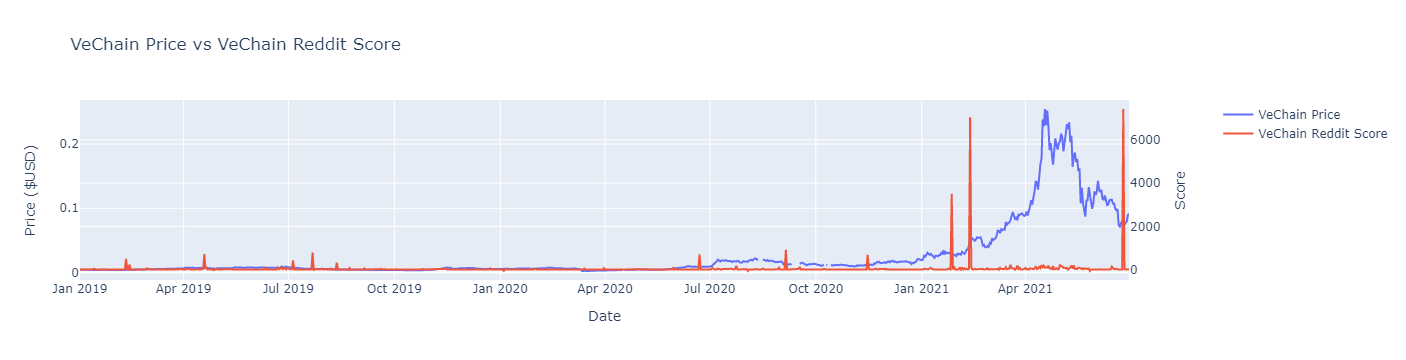

In [208]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=vc.Date, y=vc.Close, name="VeChain Price"),
    secondary_y=False,
)

fig.update_layout(
    title_text="VeChain Price vs VeChain Reddit Score"
)

fig.add_trace(
    go.Scatter(x=df_crypto.loc[("VECHAIN","VET")].index, y=df_crypto.loc["VECHAIN"]["Total Score"], name="VeChain Reddit Score"),
    secondary_y=True,
)

fig.update_xaxes(title_text="Date")

fig.update_yaxes(title_text="Price ($USD)", secondary_y=False)
fig.update_yaxes(title_text="Score", secondary_y=True)

fig.show()

In [209]:
fig.write_html("vechain.html")

## Ethereum

In [210]:
et = pd.read_csv("ETH-USD.csv")

C:\Users\azimh\AppData\Local\Temp/ipykernel_1524/1527993905.py:18: PerformanceWarning:

indexing past lexsort depth may impact performance.



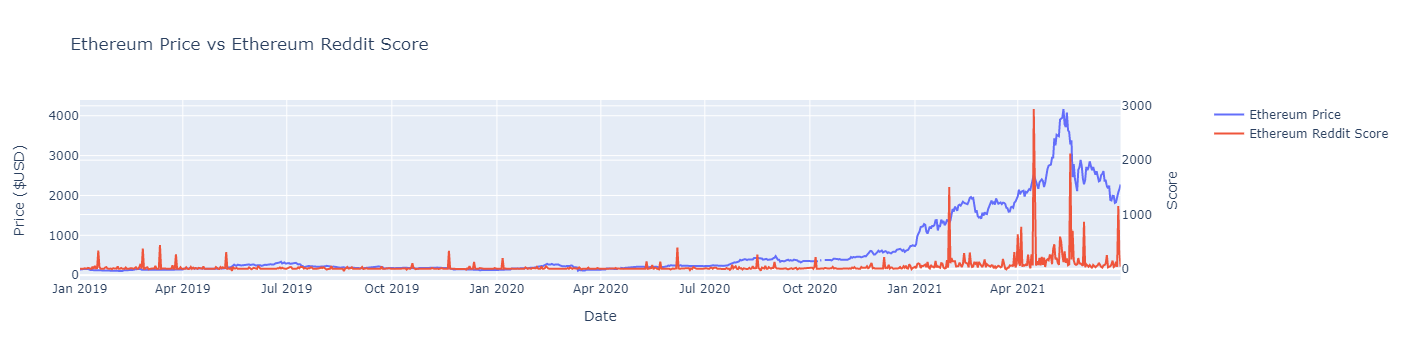

In [211]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=et.Date, y=et.Close, name="Ethereum Price"),
    secondary_y=False,
)

fig.update_layout(
    title_text="Ethereum Price vs Ethereum Reddit Score"
)

fig.add_trace(
    go.Scatter(x=df_crypto.loc[("ETHEREUM", "ETH")].index, y=df_crypto.loc["ETHEREUM"]["Total Score"], name="Ethereum Reddit Score"),
    secondary_y=True,
)

fig.update_xaxes(title_text="Date")

fig.update_yaxes(title_text="Price ($USD)", secondary_y=False)
fig.update_yaxes(title_text="Score", secondary_y=True)

fig.show()

In [212]:
fig.write_html("ethereum.html")

## Volume

## Bitcoin

C:\Users\azimh\AppData\Local\Temp/ipykernel_1524/3615850534.py:18: PerformanceWarning:

indexing past lexsort depth may impact performance.



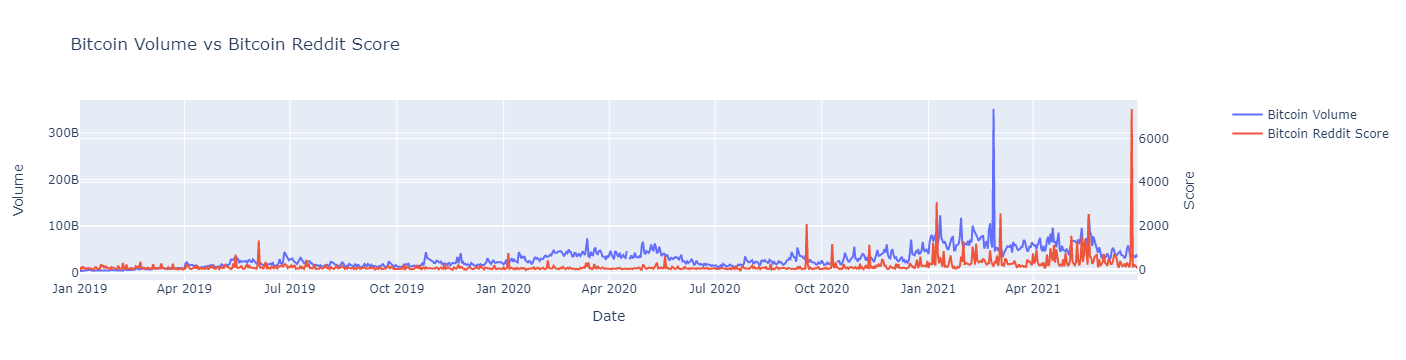

In [213]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=btc.Date, y=btc.Volume, name="Bitcoin Volume"),
    secondary_y=False,
)

fig.update_layout(
    title_text="Bitcoin Volume vs Bitcoin Reddit Score"
)

fig.add_trace(
    go.Scatter(x=df_crypto.loc[("BITCOIN", "BTC")].index, y=df_crypto.loc["BITCOIN"]["Total Score"], name="Bitcoin Reddit Score"),
    secondary_y=True,
)

fig.update_xaxes(title_text="Date")

fig.update_yaxes(title_text="Volume", secondary_y=False)
fig.update_yaxes(title_text="Score", secondary_y=True)

fig.show()

In [214]:
fig.write_html("bitcoin_volume.html")

## H3X

C:\Users\azimh\AppData\Local\Temp/ipykernel_1524/4191243874.py:18: PerformanceWarning:

indexing past lexsort depth may impact performance.



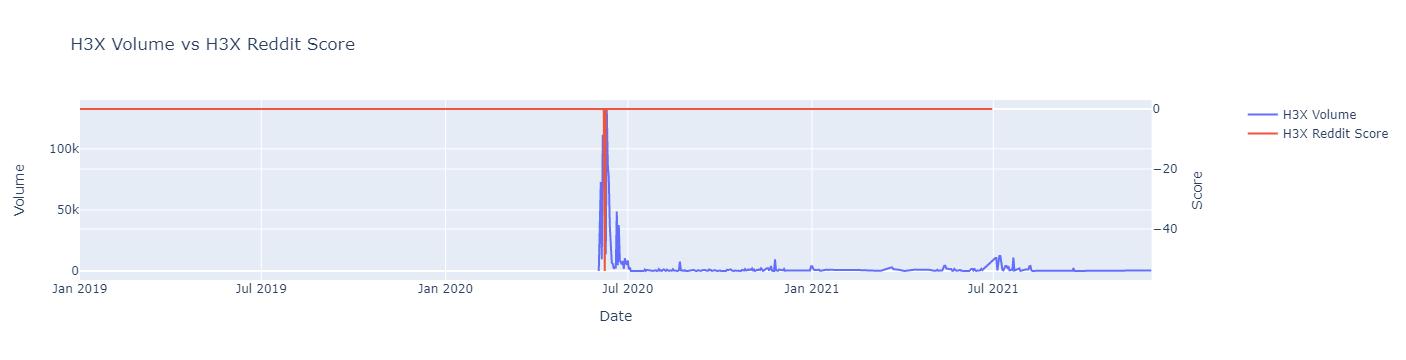

In [215]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=hx.snapped_at, y=hx.total_volume, name="H3X Volume"),
    secondary_y=False,
)

fig.update_layout(
    title_text="H3X Volume vs H3X Reddit Score"
)

fig.add_trace(
    go.Scatter(x=df_crypto.loc[("H3X", "H3X")].index, y=df_crypto.loc["H3X"]["Total Score"], name="H3X Reddit Score"),
    secondary_y=True,
)

fig.update_xaxes(title_text="Date")

fig.update_yaxes(title_text="Volume", secondary_y=False)
fig.update_yaxes(title_text="Score", secondary_y=True)

fig.show()

In [216]:
fig.write_html("h3x_volume.html")

## VeChain

C:\Users\azimh\AppData\Local\Temp/ipykernel_1524/1568109089.py:18: PerformanceWarning:

indexing past lexsort depth may impact performance.



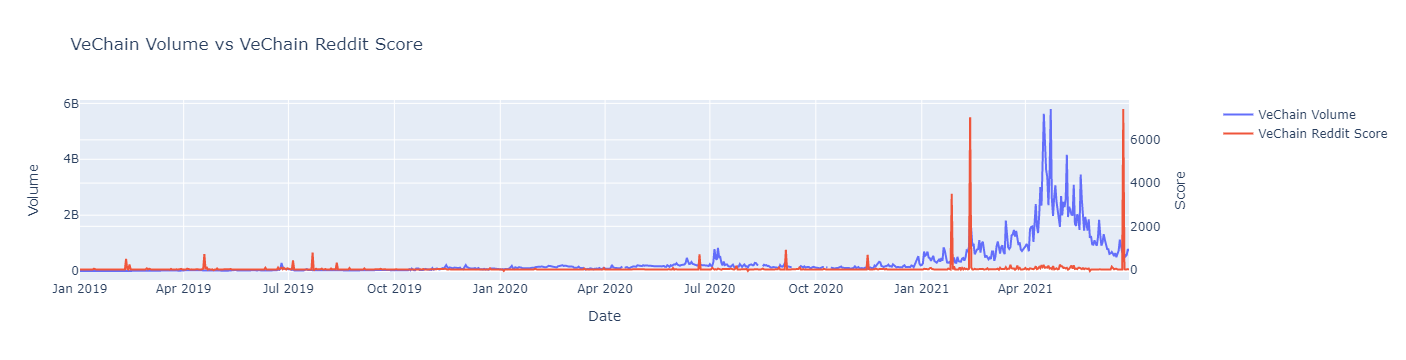

In [217]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=vc.Date, y=vc.Volume, name="VeChain Volume"),
    secondary_y=False,
)

fig.update_layout(
    title_text="VeChain Volume vs VeChain Reddit Score"
)

fig.add_trace(
    go.Scatter(x=df_crypto.loc[("VECHAIN","VET")].index, y=df_crypto.loc["VECHAIN"]["Total Score"], name="VeChain Reddit Score"),
    secondary_y=True,
)

fig.update_xaxes(title_text="Date")

fig.update_yaxes(title_text="Volume", secondary_y=False)
fig.update_yaxes(title_text="Score", secondary_y=True)

fig.show()

In [218]:
fig.write_html("vechain_volume.html")

## Ethereum

C:\Users\azimh\AppData\Local\Temp/ipykernel_1524/2109756198.py:18: PerformanceWarning:

indexing past lexsort depth may impact performance.



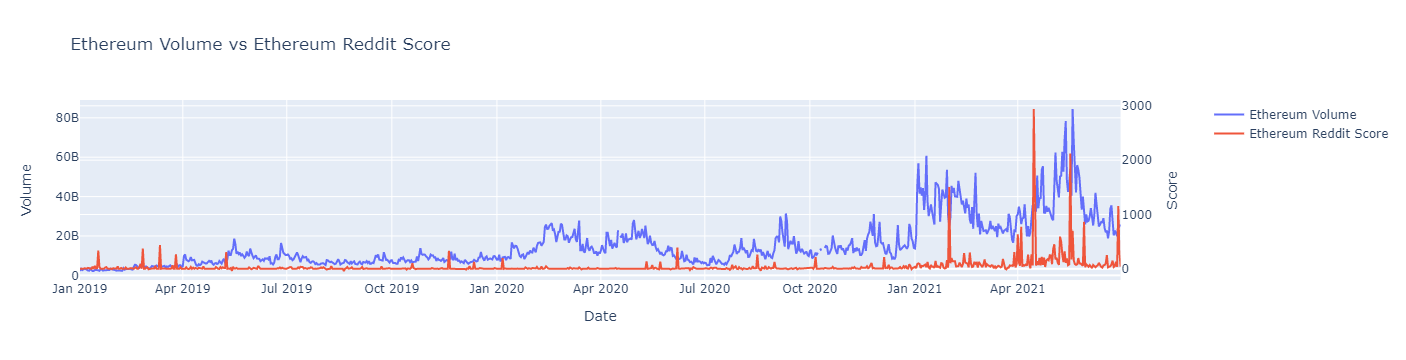

In [219]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=et.Date, y=et.Volume, name="Ethereum Volume"),
    secondary_y=False,
)

fig.update_layout(
    title_text="Ethereum Volume vs Ethereum Reddit Score"
)

fig.add_trace(
    go.Scatter(x=df_crypto.loc[("ETHEREUM", "ETH")].index, y=df_crypto.loc["ETHEREUM"]["Total Score"], name="Ethereum Reddit Score"),
    secondary_y=True,
)

fig.update_xaxes(title_text="Date")

fig.update_yaxes(title_text="Volume", secondary_y=False)
fig.update_yaxes(title_text="Score", secondary_y=True)

fig.show()

In [220]:
fig.write_html("ethereum_volume.html")